<a href="https://colab.research.google.com/github/DJS-INFOMATRIX/Machine-Learning/blob/main/LaptopPricePredicter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import copy
import tensorflow as tf

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/csv files/laptop_pricing_dataset.csv")

In [ ]:
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


Dataset link : https://www.kaggle.com/datasets/huzdaria/laptop-pricing

The parameters used in the dataset are:

1. Manufacturer.
The company that manufactured the laptop

2. Category.
The category to which the laptop belongs: This parameter is mapped to numerical values in the following way:

  Category - Assigned Value

  Gaming - 1
  
  Netbook - 2
  
  Notebook - 3
  
  Ultrabook - 4
  
  Workstation - 5
3. GPU.
The manufacturer of the GPU. This parameter is mapped to numerical values in the following way:

  GPU - Assigned Value

  AMD - 1

  Intel - 2
  
  NVidia - 3
4. OS.
The operating system type (Windows or Linux): This parameter is mapped to numerical values in the following way:

  OS - Assigned Value

  Windows - 1

  Linux - 2
5. CPU_core.
  The type of processor used in the laptop: This parameter is mapped to numerical values in the following way:

  CPU_core - Assigned Value

  Intel Pentium i3 - 3

  Intel Pentium i5 - 5
  
  Intel Pentium i7 - 7
6. Screen_Size_cm.
The size of the laptop screen is recorded in cm.

7. CPU_frequency.
The frequency at which the CPU operates, in GHz.

8. RAM_GB.
The size of the RAM of the system in GB.

9. Storage_GB_SSD.
The size of the SSD storage in GB is installed in the laptop.

10. Weight_kg.
The weight of the laptop is in kgs.

11. Price.
The price of the laptop is in USD.

In [ ]:
df.drop("Unnamed: 0",axis=1,inplace=True)
df.head()

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


In [ ]:
df['Screen'].unique()

array(['IPS Panel', 'Full HD'], dtype=object)

In [ ]:
df['Manufacturer'].unique()

array(['Acer', 'Dell', 'HP', 'Asus', 'Lenovo', 'Huawei', 'Toshiba', 'MSI',
       'Razer', 'Samsung', 'Xiaomi'], dtype=object)

Label Encoding the above categorical data.

In [ ]:
df.head()

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Manufacturer    238 non-null    object 
 1   Category        238 non-null    int64  
 2   Screen          238 non-null    object 
 3   GPU             238 non-null    int64  
 4   OS              238 non-null    int64  
 5   CPU_core        238 non-null    int64  
 6   Screen_Size_cm  234 non-null    float64
 7   CPU_frequency   238 non-null    float64
 8   RAM_GB          238 non-null    int64  
 9   Storage_GB_SSD  238 non-null    int64  
 10  Weight_kg       233 non-null    float64
 11  Price           238 non-null    int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 22.4+ KB


In [ ]:
df.isnull().sum()

Manufacturer      0
Category          0
Screen            0
GPU               0
OS                0
CPU_core          0
Screen_Size_cm    4
CPU_frequency     0
RAM_GB            0
Storage_GB_SSD    0
Weight_kg         5
Price             0
dtype: int64

In [ ]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 229 entries, 0 to 237
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Manufacturer    229 non-null    object 
 1   Category        229 non-null    int64  
 2   Screen          229 non-null    object 
 3   GPU             229 non-null    int64  
 4   OS              229 non-null    int64  
 5   CPU_core        229 non-null    int64  
 6   Screen_Size_cm  229 non-null    float64
 7   CPU_frequency   229 non-null    float64
 8   RAM_GB          229 non-null    int64  
 9   Storage_GB_SSD  229 non-null    int64  
 10  Weight_kg       229 non-null    float64
 11  Price           229 non-null    int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 23.3+ KB


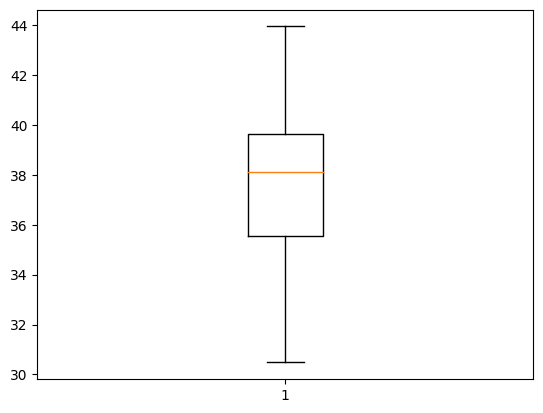

In [ ]:
plt.boxplot(df["Screen_Size_cm"])
plt.show()

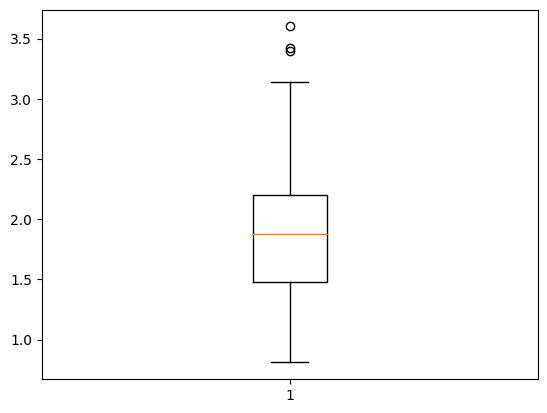

In [ ]:
plt.boxplot(df["Weight_kg"])
plt.show()

In [ ]:
df["Weight_kg"].describe()

count    229.000000
mean       1.867904
std        0.495122
min        0.810000
25%        1.480000
50%        1.880000
75%        2.200000
max        3.600000
Name: Weight_kg, dtype: float64

In [ ]:
q1=df["Weight_kg"].quantile(0.25)
q3=df["Weight_kg"].quantile(0.75)

iqr=q3-q1

ul=q3+1.5*iqr

df.loc[df["Weight_kg"]>ul, "Weight_kg"]=ul

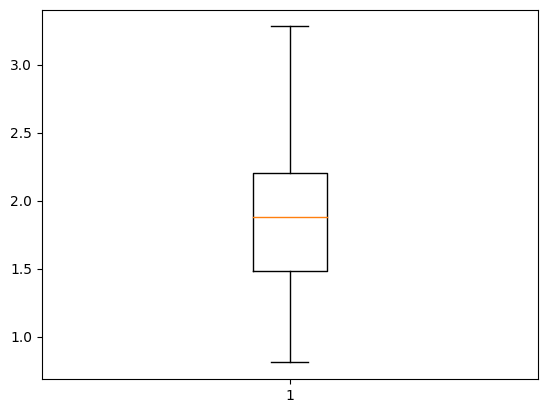

In [ ]:
plt.boxplot(df["Weight_kg"])
plt.show()

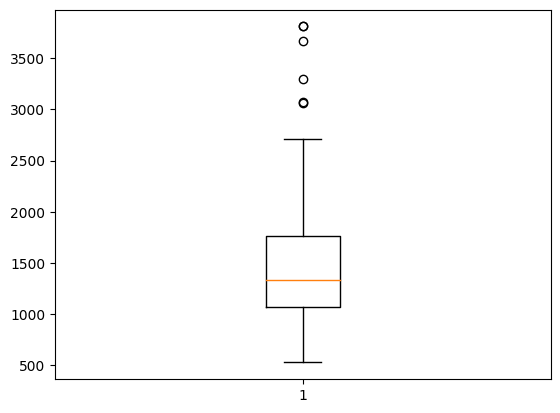

In [ ]:
plt.boxplot(df["Price"])
plt.show()

In [ ]:
df["Price"].describe()

count     229.000000
mean     1458.423581
std       574.232653
min       527.000000
25%      1068.000000
50%      1333.000000
75%      1763.000000
max      3810.000000
Name: Price, dtype: float64

In [ ]:
q1=df["Price"].quantile(0.25)
q3=df["Price"].quantile(0.75)

iqr=q3-q1

ul=q3+1.5*iqr

df.loc[df["Price"]>ul,"Price"]=ul

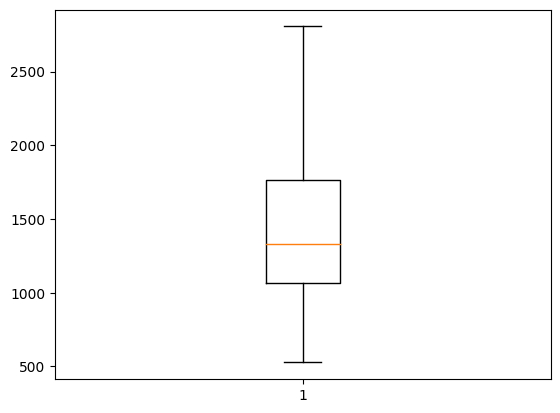

In [ ]:
plt.boxplot(df["Price"])
plt.show()

In [ ]:
df.head()

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978.0
1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634.0
2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946.0
3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244.0
4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837.0


# Splitting the data into trainig and testing

In [ ]:
le1=LabelEncoder()
df["Screen"]=le1.fit_transform(df["Screen"])
df["Manufacturer"]=le1.fit_transform(df["Manufacturer"])

In [ ]:
train,test=train_test_split(df,test_size=0.2)

**Methods of evaluating models :**

1) **Mean Absolute Error (MAE) :** We calculate the sum of all the residuals and divide it by the number of sample points. With the help of this method of evaluation we can directly compare the average of error comapred to that of the original value. Like let's say we are using linear regression to predict the price of a house, so we can use this method to comapre the actual price and the average error that is obtained when using the prediction model. The graph of the expression is of modulus type, so it isn't differentiable.

**Formula:**
$$
 \frac{\sum_{i=1}^{n} |y_i - \hat{y}_i|}{n}
$$


2) **Mean Sqaured Error (MSE) :** We calculate the sum of the squares of the residuals and then divide it with the number of sample points. This way we get a differentiable function. But, since the unit will be in square to that of the value that is to be predicted, we cannot directly compare the two. Due to this disparity in the units. A new methode arose which would be both differentiable as well as comparable to the value that is to be predicted.

**Formula:**
$$
  \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{n}
$$


3) **Root Mean Squared Error (RMSE) :** It is the same as MSE just that we find the square root of the value obtained in MSE so as to be able to compare the value of the error with the value that is to be predicted.

**Formula:**
$$
  \sqrt{\frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{n}}
$$

4) **R^2 : Coefficient of determination :** It is equal to 1 - the ratio of RSS to that of TSS. RSS is the summation of squares of the residuals (where residual = y - y_hat). TSS is the total sum of the squares of the difference between the value of y and its mean.

**Formula:**
$$
  R^2=1-\frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
$$

Using this we can say, that if the error with the line of best fit is less than the sum of its square will be small, making the the whole fraction less than 0 and smaller the numerator, lesser the value of the fraction. Thus, we can say that, closer the value of R^2 is to 1, better the line of best fit is.

# **Single Linear Regression**

Explanation video : https://youtu.be/ukZn2RJb7TU?si=BCds4eOdIInVyIW2

In [ ]:
def get_xy(dataframe, y_label, x_labels=None):
  dataframe = copy.deepcopy(dataframe)
  if x_labels is None:
    X = dataframe[[c for c in dataframe.columns if c!=y_label]].values
  else:
    if len(x_labels) == 1:
      X = dataframe[x_labels[0]].values.reshape(-1, 1)
    else:
      X = dataframe[x_labels].values

  y = dataframe[y_label].values.reshape(-1, 1)
  data = np.hstack((X, y))

  return  X, y

Standardization is a method of scaling the dataset, similar to normalization. Explanation video for normalization and standardization : https://youtu.be/kPw1IGUAoY8?si=BQrV46jMk1bUz1qU

The StandardScaler is used to standardize the data.

In [ ]:
x_train_freq,y_train_freq=get_xy(train,"Price",x_labels=["CPU_frequency"])
x_test_freq,y_test_freq=get_xy(test,"Price",x_labels=["CPU_frequency"])

scaler=StandardScaler()

x_train_freq=scaler.fit_transform(x_train_freq)
x_test_freq=scaler.fit_transform(x_test_freq)

In [ ]:
freq_reg=LinearRegression()
freq_reg.fit(x_train_freq,y_train_freq)

LinearRegression()

In [ ]:
print(f"{freq_reg.coef_},{freq_reg.intercept_}")  #This gives coeffcient of the variable and y-intercept

[[204.13917734]],[1455.96174863]


In [ ]:
freq_reg.score(x_train_freq,y_train_freq)   #This shows the percentage of correlation the two parameters have. In this case the parameters are frequency and the price

0.15652373506547212

In [ ]:
freq_reg.score(x_test_freq,y_test_freq)

0.12227153533773683

In [ ]:
ytest_pred=freq_reg.predict(x_test_freq)
ytrain_pred=freq_reg.predict(x_train_freq)

test_rmse=np.sqrt(mean_squared_error(y_test_freq,ytest_pred))
train_rmse=np.sqrt(mean_squared_error(y_train_freq,ytrain_pred))

print(f'Training RMSE = {train_rmse}\nTesting RSME = {test_rmse}')

Training RMSE = 473.884705319711
Testing RSME = 490.272535174424


In [ ]:
mean_absolute_error(y_test_freq,ytest_pred)

383.3979831143139

Since both the RMSE values are high we can say that the model has underfit.

**Underfit** : High training and testing RMSE

**Good fit** : Low training and testing RMSE

**Overfit** : Low training RMSE but high testing RMSE

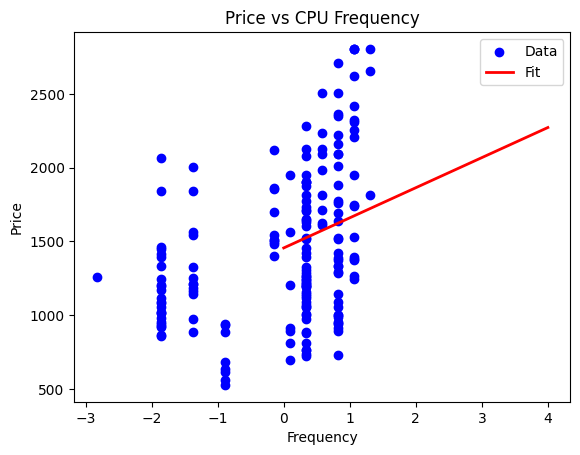

In [ ]:
plt.scatter(x_train_freq, y_train_freq, label="Data", color="blue")
x = tf.linspace(0, 4, 100)
plt.plot(x, freq_reg.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=2)
plt.legend()
plt.title("Price vs CPU Frequency")
plt.ylabel("Price")
plt.xlabel("Frequency")
plt.show()

But, this is only the line of best fit with the parameter of CPU frequency.Thus, to get the line of best fit for all the parameters, we will have to use  multiple linear regression.

# Multiple Linear Regression

Explanation video : https://youtu.be/R2Zb5s_RrDU?si=cRaahAIQDpPV2xIo

In [ ]:
df.head()

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,4,1,2,1,5,35.560,1.6,8,256,1.60,978.0
1,2,3,0,1,1,3,39.624,2.0,4,256,2.20,634.0
2,2,3,0,1,1,7,39.624,2.7,8,256,2.20,946.0
3,2,4,1,2,1,5,33.782,1.6,8,128,1.22,1244.0
4,3,4,0,2,1,7,39.624,1.8,8,256,1.91,837.0


In [ ]:
x_train_all,y_train_all=get_xy(train,"Price",x_labels=df.columns[:-1])
x_test_all,y_test_all=get_xy(test,"Price",x_labels=df.columns[:-1])

x_train_all=scaler.fit_transform(x_train_all)
x_test_all=scaler.fit_transform(x_test_all)

In [ ]:
multi_reg=LinearRegression()
multi_reg.fit(x_train_all,y_train_all)

LinearRegression()

In [ ]:
multi_reg.score(x_test_all,y_test_all)

0.5907660482170434

In [ ]:
ytest_pred=multi_reg.predict(x_test_all)
ytrain_pred=multi_reg.predict(x_train_all)

test_rmse=np.sqrt(mean_squared_error(y_test_all,ytest_pred))
train_rmse=np.sqrt(mean_squared_error(y_train_all,ytrain_pred))

print(f'Training RMSE = {train_rmse}\nTesting RMSE = {test_rmse}')

Training RMSE = 339.163508834389
Testing RMSE = 334.76751022812886


In [ ]:
mean_absolute_error(y_test_all,ytest_pred)

256.80735530336

In [ ]:
print(f'Training R2 score :{multi_reg.score(x_train_all,y_train_all)}')
print(f'Testing R2 score :{multi_reg.score(x_test_all,y_test_all)}')

Training R2 score :0.5679383483909832
Testing R2 score :0.5907660482170434


# Support Vector Regressor

Explanation video : https://youtu.be/kPw1IGUAoY8?si=BQrV46jMk1bUz1qU

In [ ]:
from sklearn.svm import SVR


svr_reg = SVR(kernel='linear', C=15.0, epsilon=1.0)

#kernel is basically deciding what type of line or plane do you want to fit the data.
#epsilon specifies the range of error such that the model is not given a penalty.
#C is the regularization parameter, it acts as a trade of between low training accuracy and complexity of the model.
svr_reg.fit(x_train_all,y_train_all.ravel()) #.ravel() is used to converted 1D since that is how SVR requires it to be

SVR(C=15.0, epsilon=1.0, kernel='linear')

In [ ]:
ytrain_pred=svr_reg.predict(x_train_all)
ytest_pred=svr_reg.predict(x_test_all)

print(f'Training RMSE : {np.sqrt(mean_squared_error(y_train_all,ytrain_pred))}\nTesting RMSE : {np.sqrt(mean_squared_error(y_test_all,ytest_pred))}')

Training RMSE : 346.54550785555847
Testing RMSE : 350.2129640769319


In [ ]:
print(f'Training R2 score :{svr_reg.score(x_train_all,y_train_all)}')
print(f'Testing R2 score :{svr_reg.score(x_test_all,y_test_all)}')

Training R2 score :0.5489257565171176
Testing R2 score :0.5521325603155749


Using grid search to identify the best possible parameters to train an efficient model.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100,200,300],
    'epsilon': [0.1, 0.3, 0.5],
    'gamma': ['scale', 'auto'],   #gamma determines the shape of the decision boundary
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid']
}

grid_search = GridSearchCV(SVR(), param_grid, cv=10, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(x_train_all, y_train_all.ravel())

best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

Fitting 10 folds for each of 144 candidates, totalling 1440 fits
Best parameters: {'C': 100, 'epsilon': 0.5, 'gamma': 'scale', 'kernel': 'linear'}


In [ ]:
svr_reg = SVR(kernel='linear', C=100, epsilon=0.5,gamma='scale')
model=svr_reg.fit(x_train_all,y_train_all.ravel())

In [ ]:
ytrain_pred=svr_reg.predict(x_train_all)
ytest_pred=svr_reg.predict(x_test_all)

print(f'Training RMSE : {np.sqrt(mean_squared_error(y_train_all,ytrain_pred))}\nTesting RMSE : {np.sqrt(mean_squared_error(y_test_all,ytest_pred))}')

Training RMSE : 348.5121935379442
Testing RMSE : 351.85122021508073


In [ ]:
print(f'Training R2 score : {svr_reg.score(x_train_all,y_train_all)}')
print(f'Testing R2 score : {svr_reg.score(x_test_all,y_test_all)}')

Training R2 score : 0.5437914321998114
Testing R2 score : 0.5479326146234178


# Random Forest for Regression

Explanation video : https://youtu.be/YUsx5ZNlYWc?si=CUEqS1U1iVimfplz

In [ ]:
from sklearn.ensemble import RandomForestRegressor

y_train_all=y_train_all.ravel()
y_test_all=y_test_all.ravel()

rfr=RandomForestRegressor(bootstrap=True,min_impurity_decrease=0.01,oob_score=True,verbose=1)
#rfr.get_params()

#n_estimator is the parameter used to specify the number of tree are to be generated.

#criterion is used to measure the quality of the model. It will try to improve the trees based on this criterion. Possible criterions are “squared_error”, “absolute_error”,
#  “friedman_mse”, “poisson”. squared_error is the default criterion.

#bootstrap is a method by which the given dataset is split into smaller subsets. Each subset can have duplicates from the original dataset,
#  by doing so the model becomes robust and it even prevents overfitting.

#min_impurity_decrease is kinda like an early stopping parameter. So basically, impurity is calculated on the basis of the criterion set,
#  so this parameter will set the minimum amount of impurity that must decrease so as to generate a new improved tree.
#  If the improvement is not significant than the training is stopped.

#oob_score stands for out-of-bag score, so it will generate an out of the dataset datapoint to check how will the model is working on datapoints that it hasn't already seen.
#  This parameter is a boolean so we can enable or disable the feature of evaluating the model while training.

#warm_start is the parameter which will specify whether the new tree will reuse the solution of the previous tree and improve upon it.
#  We must be careful with this since it might cause overfitting.

In [ ]:
rfr.fit(x_train_all,y_train_all)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s


RandomForestRegressor(min_impurity_decrease=0.01, oob_score=True, verbose=1)

In [ ]:
ytrain_pred=rfr.predict(x_train_all)
ytest_pred=rfr.predict(x_test_all)

print(f'Training RMSE : {np.sqrt(mean_squared_error(y_train_all,ytrain_pred))}\nTesting RMSE : {np.sqrt(mean_squared_error(y_test_all,ytest_pred))}')

Training RMSE : 119.10798435597117
Testing RMSE : 312.1433037293408


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


In [ ]:
print(f'Training R2 score : {rfr.score(x_train_all,y_train_all)}')
print(f'Testing R2 score : {rfr.score(x_test_all,y_test_all)}')

Training R2 score : 0.9467144770171749
Testing R2 score : 0.6442105237886537


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'min_samples_split': [2, 5, 10],
    'min_impurity_decrease':[0.01,0.1,0.5],
    'bootstrap':[True,False]
}

rfr=RandomForestRegressor()

grid_search=GridSearchCV(rfr, param_grid, cv=10, scoring='neg_mean_squared_error')  # Use 'neg_mean_squared_error' for minimization

grid_search.fit(x_train_all, y_train_all)
best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test_all)
mse = mean_squared_error(y_test_all, y_pred)
print(f"Mean Squared Error: {mse}")

print(f"Best Hyperparameters: {grid_search.best_params_}")


Mean Squared Error: 93048.65883975144
Best Hyperparameters: {'bootstrap': True, 'min_impurity_decrease': 0.01, 'min_samples_split': 10, 'n_estimators': 300}


In [ ]:
rfr=RandomForestRegressor(n_estimators=300,min_samples_split=10,min_impurity_decrease=0.01,bootstrap=True,verbose=1)

In [ ]:
rfr.fit(x_train_all,y_train_all)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s


RandomForestRegressor(min_impurity_decrease=0.01, min_samples_split=10,
                      n_estimators=300, verbose=1)

In [ ]:
ytrain_pred=rfr.predict(x_train_all)
ytest_pred=rfr.predict(x_test_all)

print(f'Training RMSE : {np.sqrt(mean_squared_error(y_train_all,ytrain_pred))}\nTesting RMSE : {np.sqrt(mean_squared_error(y_test_all,ytest_pred))}')

Training RMSE : 192.8043001667148
Testing RMSE : 306.24529064791966


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


In [ ]:
print(f'Training R2 score : {rfr.score(x_train_all,y_train_all)}')
print(f'Testing R2 score : {rfr.score(x_test_all,y_test_all)}')

Training R2 score : 0.8603757305108342
Testing R2 score : 0.6575289299484023


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


# Ridge Regression aka L2 regularization

Explanation video : https://youtu.be/Q81RR3yKn30?si=f3opFQSXaVKEmjj

Regularization is used to tackle the problem of overfitting.

$$
L(\theta) = L(original) + \lambda \sum_{j=1}^{n} \theta_j^2
$$

where,

* L(θ) is the loss function
* λ regularization parameter
* λ∑j=1n θj^2 is the L2 regularization term
* θ are the model parameters

In [ ]:
from sklearn.linear_model import Ridge

ridge=Ridge()
ridge.fit(x_train_all,y_train_all)

ytrain_pred=ridge.predict(x_train_all)
ytest_pred=ridge.predict(x_test_all)

print(f'Training RMSE : {np.sqrt(mean_squared_error(y_train_all,ytrain_pred))}\nTesting RMSE : {np.sqrt(mean_squared_error(y_test_all,ytest_pred))}')

Training RMSE : 339.17558684640807
Testing RMSE : 334.253218223057


In [ ]:
print(f'Training R2 score : {ridge.score(x_train_all,y_train_all)}')
print(f'Testing R2 score : {ridge.score(x_test_all,y_test_all)}')

Training R2 score : 0.5679075753944628
Testing R2 score : 0.5920224669403282


There is an algorithm called RidgeCV that has cross-validation in-built. We can make use of it instead of using cross validation separately. But, the problem with this is that the alpha values that can be set for cross-validation are fixed in this case. The fixed values are 0.1,1,10

In [ ]:
from sklearn.linear_model import RidgeCV

ridge_cv=RidgeCV()
ridge_cv.fit(x_train_all,y_train_all)

ytrain_pred=ridge_cv.predict(x_train_all)
ytest_pred=ridge_cv.predict(x_test_all)

print(f'Training RMSE : {np.sqrt(mean_squared_error(y_train_all,ytrain_pred))}\nTesting RMSE : {np.sqrt(mean_squared_error(y_test_all,ytest_pred))}')

Training RMSE : 339.909313274995
Testing RMSE : 332.6463076362532


In [ ]:
print(f'Training R2 score : {ridge_cv.score(x_train_all,y_train_all)}')
print(f'Testing R2 score : {ridge_cv.score(x_test_all,y_test_all)}')

Training R2 score : 0.5660360931184734
Testing R2 score : 0.5959357131518217


Thus, trying to use cross-validation with different cross-validation alpha values than that are fixed in RidgeCV

In [ ]:
param_grid={
    'alpha':[0.001,0.01,0.1,1,10,100],  #It is the lamda(i.e. the l1 regularization coefficient)
    'tol':[0.001,0.01,0.1,1,10,100]
}

ridge_cv=GridSearchCV(ridge,param_grid,cv=5)
ridge_cv.fit(x_train_all, y_train_all)
best_model = ridge_cv.best_estimator_

y_pred = best_model.predict(x_test_all)
mse = mean_squared_error(y_test_all, y_pred)
print(f"Mean Squared Error: {mse}")

print(f"Best Hyperparameters: {ridge_cv.best_params_}")

Mean Squared Error: 110653.56598402947
Best Hyperparameters: {'alpha': 10, 'tol': 0.001}


In [ ]:
ridge=Ridge(alpha=10,tol=0.001)
ridge.fit(x_train_all,y_train_all)

ytrain_pred=ridge.predict(x_train_all)
ytest_pred=ridge.predict(x_test_all)

print(f'Training RMSE : {np.sqrt(mean_squared_error(y_train_all,ytrain_pred))}\nTesting RMSE : {np.sqrt(mean_squared_error(y_test_all,ytest_pred))}')

Training RMSE : 339.90931327499425
Testing RMSE : 332.6463076362482


In [ ]:
print(f'Training R2 score : {ridge_cv.score(x_train_all,y_train_all)}')
print(f'Testing R2 score : {ridge_cv.score(x_test_all,y_test_all)}')

Training R2 score : 0.5660360931184752
Testing R2 score : 0.5959357131518338


# Lasso Regression (Lasso : least absolute shrinkage and selection operator) aka L1 Regularization

Explanation video : https://youtu.be/NGf0voTMlcs?si=6UNiTTi6TOrkaSZn

$$
L(\theta) = L(original) + \alpha \sum_{j=1}^{n} |\theta_j|
$$

where,

* L(θ) is the loss function
* λ regularization parameter
* λ∑j=1n|θj| is the L1 regularization term
* θ are the model parameters

In [ ]:
from sklearn.linear_model import Lasso

lasso=Lasso()
lasso.fit(x_train_all,y_train_all)

ytrain_pred=lasso.predict(x_train_all)
ytest_pred=lasso.predict(x_test_all)

print(f'Training RMSE : {np.sqrt(mean_squared_error(y_train_all,ytrain_pred))}\nTesting RMSE : {np.sqrt(mean_squared_error(y_test_all,ytest_pred))}')

Training RMSE : 339.2067942621685
Testing RMSE : 334.0747506871792


In [ ]:
print(f'Training R2 score : {lasso.score(x_train_all,y_train_all)}')
print(f'Testing R2 score : {lasso.score(x_test_all,y_test_all)}')

Training R2 score : 0.5678280584196813
Testing R2 score : 0.5924580128268637


In [ ]:
param_grid={
    'alpha':[10,12,14,16,18,20],  #It is the lamda(i.e. the l1 regularization coefficient)
    'tol':[0.01,0.1,0.5,1,5,10]
}

lasso_cv=GridSearchCV(lasso,param_grid,cv=5)
lasso_cv.fit(x_train_all, y_train_all)
best_model = lasso_cv.best_estimator_

y_pred = best_model.predict(x_test_all)
mse = mean_squared_error(y_test_all, y_pred)
print(f"Mean Squared Error: {mse}")

print(f"Best Hyperparameters: {lasso_cv.best_params_}")

Mean Squared Error: 110690.9997066175
Best Hyperparameters: {'alpha': 10, 'tol': 0.5}


In [ ]:
lasso=Lasso(alpha=10,tol=0.01)
lasso.fit(x_train_all,y_train_all)

ytrain_pred=lasso.predict(x_train_all)
ytest_pred=lasso.predict(x_test_all)

print(f'Training RMSE : {np.sqrt(mean_squared_error(y_train_all,ytrain_pred))}\nTesting RMSE : {np.sqrt(mean_squared_error(y_test_all,ytest_pred))}')

Training RMSE : 341.902454650798
Testing RMSE : 334.0299122741355


In [ ]:
print(f'Training R2 score : {lasso.score(x_train_all,y_train_all)}')
print(f'Testing R2 score : {lasso.score(x_test_all,y_test_all)}')

Training R2 score : 0.5609318649516958
Testing R2 score : 0.5925674033725966


# XGBoost Regressor

Explaination video : https://youtu.be/OtD8wVaFm6E?si=11o9j_knrnshp2Y7

In [ ]:
from xgboost import XGBRegressor

xgbr=XGBRegressor(objective='reg:squarederror',   #Defines what the model has to do, in this case it wants to plot a regression line minimizing the mean squared error.
                  max_depth=10,   #Defines how deep the tree can be
                  learning_rate=0.01,   #Defines how fast the tree learns
                  n_estimators=100    #No. of trees to be generated
                  )

xgbr.fit(x_train_all,y_train_all)

ytrain_pred=xgbr.predict(x_train_all)
ytest_pred=xgbr.predict(x_test_all)

print(f'Training RMSE : {np.sqrt(mean_squared_error(y_train_all,ytrain_pred))}\nTesting RMSE : {np.sqrt(mean_squared_error(y_test_all,ytest_pred))}')

Training RMSE : 251.42382584616476
Testing RMSE : 423.26090895468366


In [ ]:
print(f'Training R2 score : {xgbr.score(x_train_all,y_train_all)}')
print(f'Testing R2 score : {xgbr.score(x_test_all,y_test_all)}')

Training R2 score : 0.7625674026225804
Testing R2 score : 0.345813807807114


In [ ]:
'''
param_grid = {
    'max_depth': [2, 4, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'reg_alpha': [0.01, 0.1, 1],    #Adding L1 regularization
    'reg_lambda': [0.01, 0.1, 1],   #Adding L2 regularization
    'subsample': [0.6, 0.8, 1.0],   #Specifies the fraction of the training data to be randomly sampled for each tree.
    'colsample_bytree': [0.6, 0.8, 1.0]   #Specifies the fraction of features (columns) to be randomly sampled for each tree.
}

xgbr_cv=GridSearchCV(xgbr,param_grid,cv=5,verbose=1,error_score=np.nan)
xgbr_cv.fit(x_train_all, y_train_all.ravel())
best_model = xgbr_cv.best_estimator_

y_pred = best_model.predict(x_test_all)
mse = mean_squared_error(y_test_all, y_pred)
print(f"Mean Squared Error: {mse}")

print(f"Best Hyperparameters: {xgbr_cv.best_params_}")
'''

'\nparam_grid = {\n    \'max_depth\': [2, 4, 6, 8, 10],\n    \'learning_rate\': [0.01, 0.05, 0.1],\n    \'n_estimators\': [100, 200, 300],\n    \'reg_alpha\': [0.01, 0.1, 1],    #Adding L1 regularization\n    \'reg_lambda\': [0.01, 0.1, 1],   #Adding L2 regularization\n    \'subsample\': [0.6, 0.8, 1.0],   #Specifies the fraction of the training data to be randomly sampled for each tree.\n    \'colsample_bytree\': [0.6, 0.8, 1.0]   #Specifies the fraction of features (columns) to be randomly sampled for each tree.\n}\n\nxgbr_cv=GridSearchCV(xgbr,param_grid,cv=5,verbose=1,error_score=np.nan)\nxgbr_cv.fit(x_train_all, y_train_all.ravel())\nbest_model = xgbr_cv.best_estimator_\n\ny_pred = best_model.predict(x_test_all)\nmse = mean_squared_error(y_test_all, y_pred)\nprint(f"Mean Squared Error: {mse}")\n\nprint(f"Best Hyperparameters: {xgbr_cv.best_params_}")\n'

In [ ]:
xgbr=XGBRegressor(objective='reg:squarederror',max_depth=5,learning_rate=0.1,n_estimators=200,reg_alpha=0.1,reg_lambda=1,subsample=0.1,colsample_bytree=0.8)

xgbr.fit(x_train_all,y_train_all)

ytrain_pred=xgbr.predict(x_train_all)
ytest_pred=xgbr.predict(x_test_all)

print(f'Training RMSE : {np.sqrt(mean_squared_error(y_train_all,ytrain_pred))}\nTesting RMSE : {np.sqrt(mean_squared_error(y_test_all,ytest_pred))}')

Training RMSE : 160.68998134144275
Testing RMSE : 322.1938508830529


In [ ]:
print(f'Training R2 score : {xgbr.score(x_train_all,y_train_all)}')
print(f'Testing R2 score : {xgbr.score(x_test_all,y_test_all)}')

Training R2 score : 0.9030148855052985
Testing R2 score : 0.6209298841708284
